# **Libraries & Dependencies**

In [507]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [509]:
data = pd.read_csv('/content/gdrive/MyDrive/maven-marketing/marketing_data.csv')
data_dict = pd.read_csv('/content/gdrive/MyDrive/maven-marketing/marketing_data_dictionary.csv')

In [510]:
data.head()

ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2014-06-16        0       189  ...                  6                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2014-05-13        0       134  ...                  5                  2   
3  2014-05-11        0        10  ...                  2                  7   
4  2014-04-08        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain    Country  
0         1         0      Spain  
1         1         0     Canada  
2         0         0        USA  
3         0         0  Australia  
4         1         0      Spain  

[5 rows x 28 columns]

In [511]:
print('Dataset Description')
print('==========')
for i, row in data_dict.iterrows():
    print(f"{row['Field']:<20}", ': ', row['Description'], sep='')

Dataset Description
ID                  : Customer's unique identifier
Year_Birth          : Customer's birth year
Education           : Customer's education level
Marital_Status      : Customer's marital status
Income              : Customer's yearly household income
Kidhome             : Number of children in customer's household
Teenhome            : Number of teenagers in customer's household
Dt_Customer         : Date of customer's enrollment with the company
Recency             : Number of days since customer's last purchase
MntWines            : Amount spent on wine in the last 2 years
MntFruits           : Amount spent on fruits in the last 2 years
MntMeatProducts     : Amount spent on meat in the last 2 years
MntFishProducts     : Amount spent on fish in the last 2 years
MntSweetProducts    : Amount spent on sweets in the last 2 years
MntGoldProds        : Amount spent on gold in the last 2 years
NumDealsPurchases   : Number of purchases made with a discount
NumWebPurchases   

# **Data Wrangling**

Before proceeding further into the modeling and analysis part, first the data needs to be preprocessed and prepared first. The steps include:

- Data Discovery
- Data Transformation & Structuring
- Data Cleaning:
  - Handle Duplicates, Outliers, Missing Values
- Data Enriching / Feature Engineering

### **Initial Data Discovery**

This part is just for the initial understanding of what the dataset roughly looks like.

In [512]:
data.shape

(2240, 28)

In [513]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [514]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
 Income                float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [515]:
data.rename(columns={' Income ': 'Income'}, inplace=True)

In [516]:
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cat_cols = ['Marital_Status', 'Country']
binary_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
               'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
ord_cols = ['Education']
other_cols = ['Dt_Customer']

##### **Univariate Analysis**

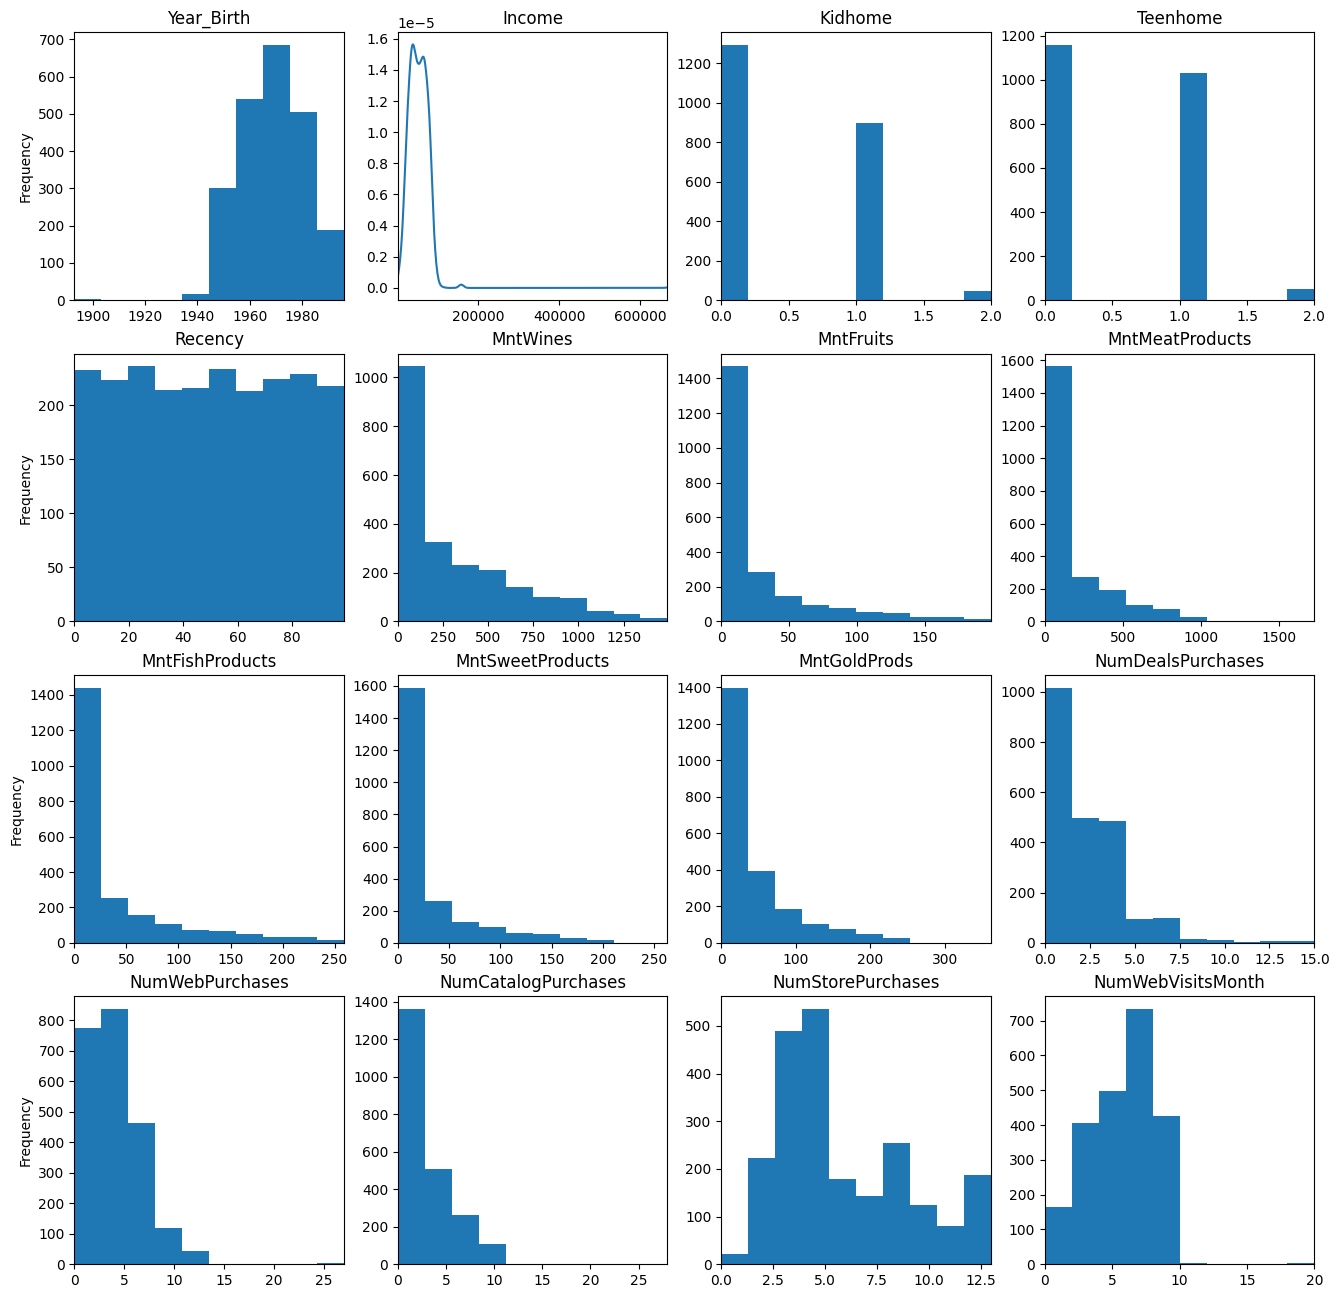

In [517]:
plt.figure(figsize=(16, 16))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    if data[col].dtype == 'int':
        data[col].dropna().plot(kind='hist')
    elif data[col].dtype == 'float':
        data[col].dropna().plot(kind='density')
    plt.title(col)
    if i % 4 != 0:
        plt.ylabel('')
    plt.xlim(min(data[col].dropna()), max(data[col].dropna()))
plt.show()

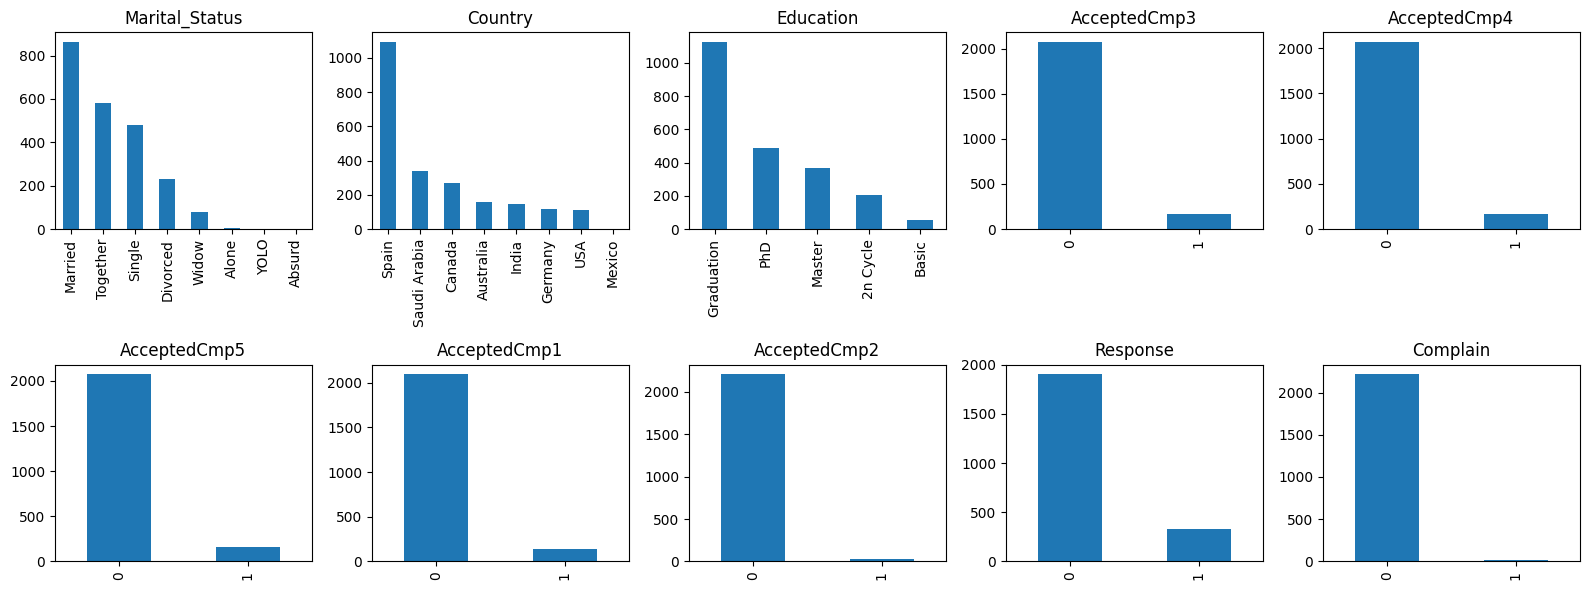

In [518]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(cat_cols + ord_cols + binary_cols):
    plt.subplot(2, 5, i+1)
    if len(data[col].value_counts()) >= 20:
        data[col].value_counts()[:5].plot(kind='bar')
    else:
        data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

##### **Bivariate Analysis**

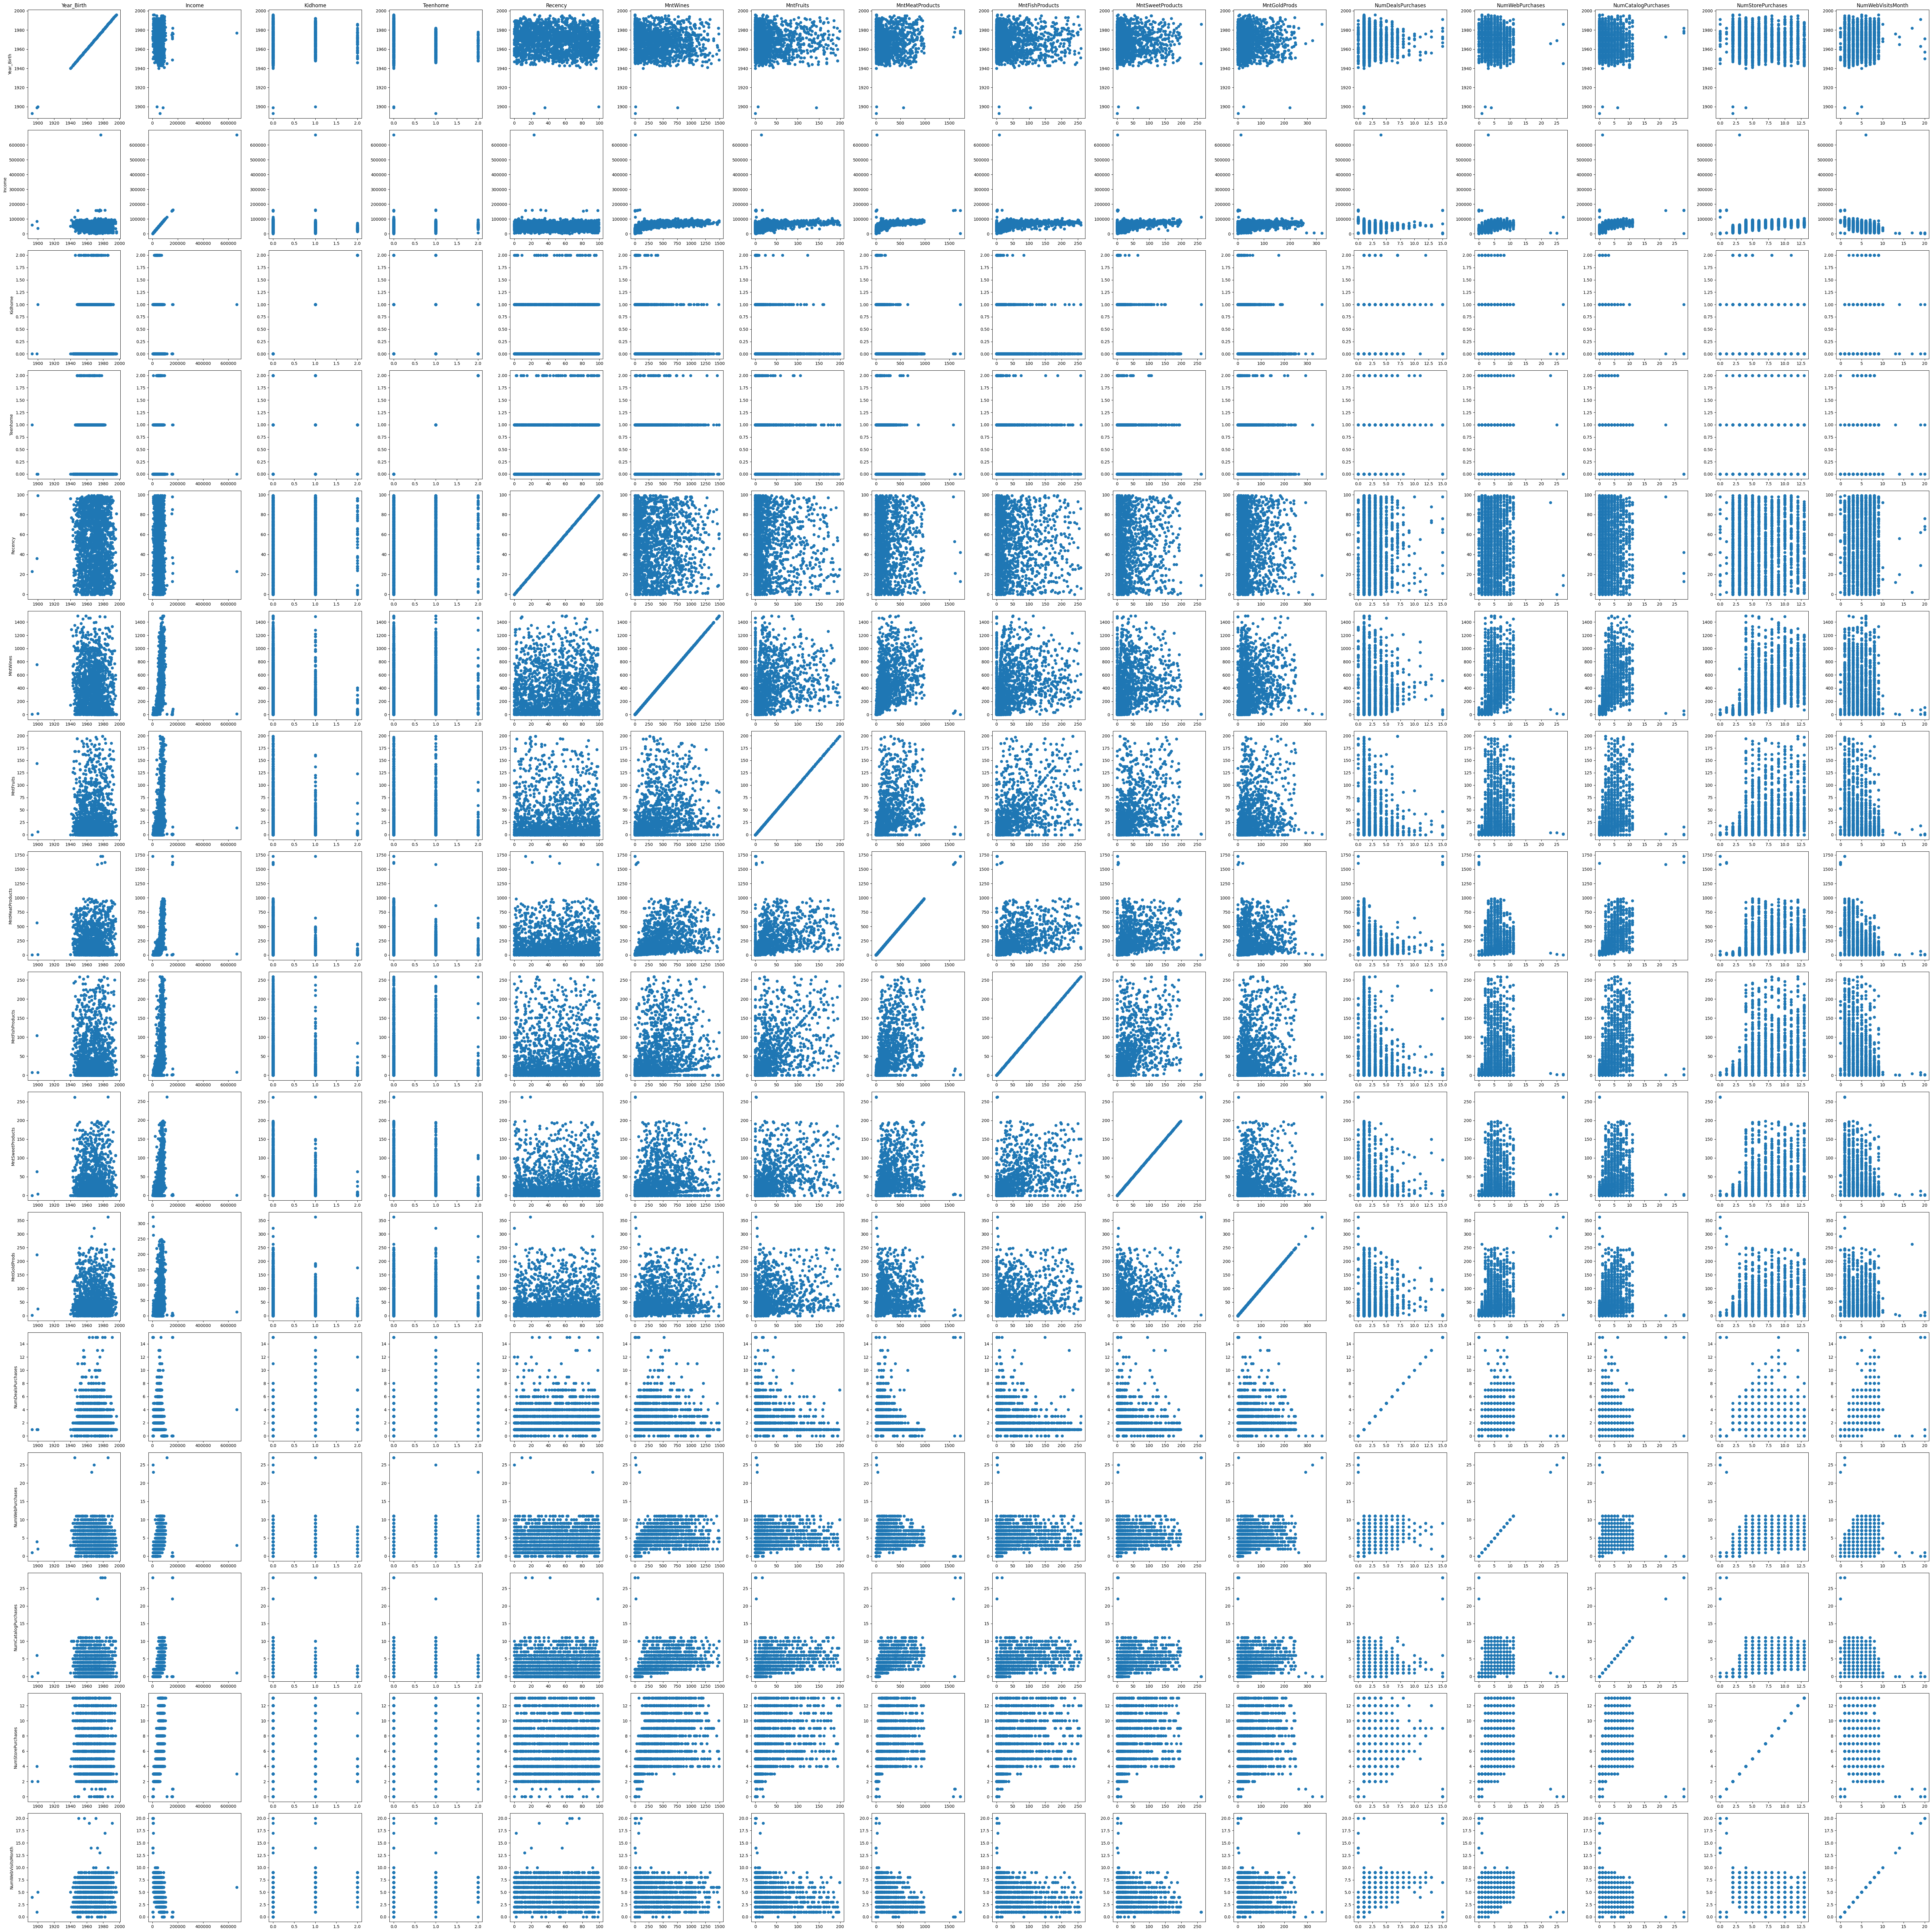

In [519]:
plt.figure(figsize=(64, 64))
idx = 1
for i, col_1 in enumerate(num_cols):
    for j, col_2 in enumerate(num_cols):
        plt.subplot(16, 16, idx)
        plt.scatter(data[col_2], data[col_1])
        if (idx-1) % 16 == 0:
            plt.ylabel(col_1)
        if idx <= 16:
            plt.title(col_2)
        idx += 1
plt.tight_layout()
plt.show()

### **Data Transformation & Structuring**

In this part, the dataset columns will be converted into the appropriate and correct data types.

In [520]:
#data[num_cols] = data[num_cols].astype('int')
data[cat_cols] = data[cat_cols].astype('category')
data[binary_cols] = data[binary_cols].astype(bool)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

### **Data Cleaning**

The dataset used may still be "dirty". So, it needs to be "cleaned" first before proceeding. This will be done by checking for **duplicates** on the dataset, handling **outliers** (or extreme values), as well as taking care of **missing values**.

##### **Check for Duplicates**

In [521]:
data.duplicated().sum()

0

##### **Outliers**

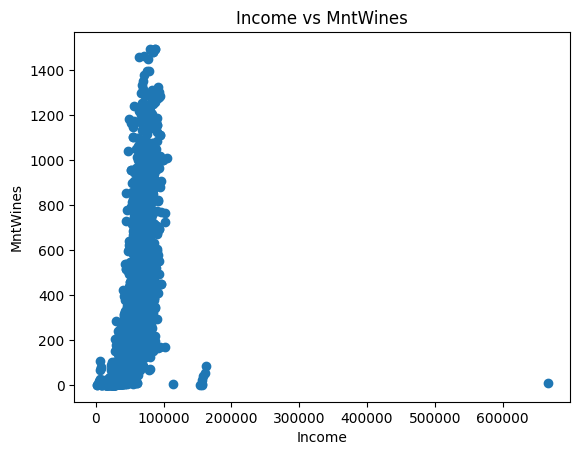

In [522]:
plt.scatter(data['Income'], data['MntWines'])
plt.title('Income vs MntWines')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()

In [523]:
data.drop(data[data['Income'] > 150000].index, inplace=True)

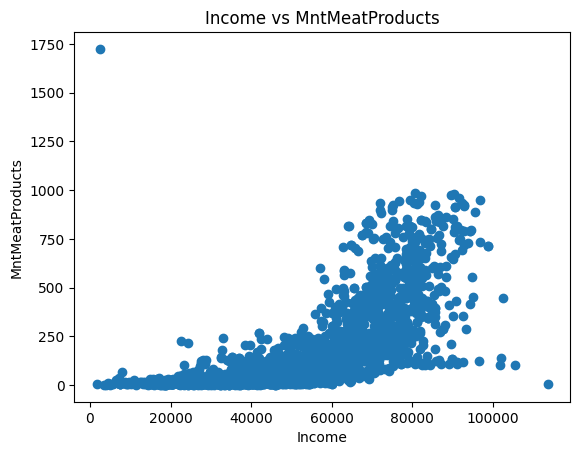

In [524]:
plt.scatter(data['Income'], data['MntMeatProducts'])
plt.title('Income vs MntMeatProducts')
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.show()

In [525]:
data.drop(data[data['MntMeatProducts'] > 1500].index, inplace=True)

##### **Handle Missing Values**

In [526]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [527]:
data['Income'].fillna(0, inplace=True)

In [528]:
data[num_cols] = data[num_cols].astype('int')

### **Data Enriching / Feature Engineering**

Now let's enrich the data and perform **feature engineering**, such as by transforming the variables, combining different variables, etc, in order to capture more patterns in the dataset, which hopefully can also enhance the model's predictive power later on

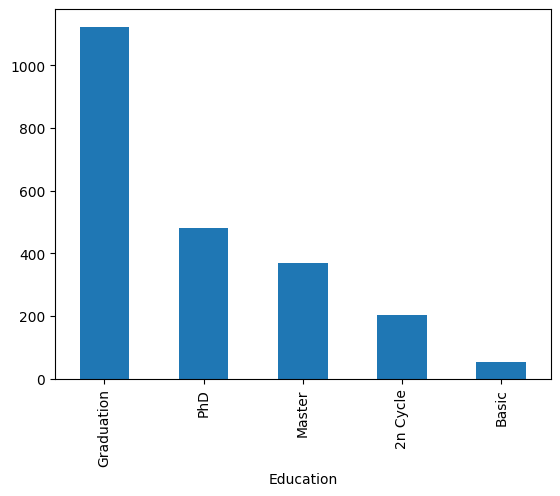

In [529]:
data['Education'].value_counts().plot(kind='bar')
plt.show()

In [530]:
data['Education'].replace('Graduation', 'Bachelor', inplace=True)
data['Education'].replace('2n Cycle', 'Master', inplace=True)
data['Education'].replace('Basic', 'High School', inplace=True)

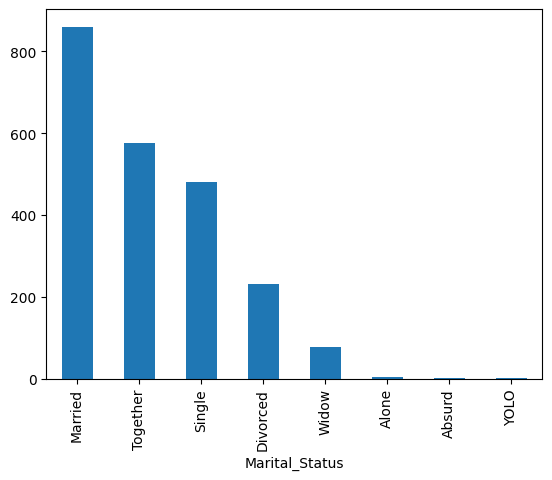

In [531]:
data['Marital_Status'].value_counts().plot(kind='bar')
plt.show()

In [532]:
data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single', inplace=True)

In [533]:
data['HasPartner'] = [1 if (i == 'Married' or i == 'Together') else 0 for i in data['Marital_Status']]

In [534]:
data['TotalKid'] = data['Kidhome'] + data['Teenhome']

In [535]:
data['Household'] = 1 + data['HasPartner'] + data['TotalKid']

In [536]:
data['IncomeHouseholdRatio'] = data['Income'] / data['Household']

In [537]:
data['YearJoined'] = data['Dt_Customer'].dt.year

In [538]:
data['AgeJoined'] = data['YearJoined'] - data['Year_Birth']

In [540]:
data['TotalMnt'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [541]:
data['IncomeMntRatio'] = data['Income'] / data['TotalMnt']

In [542]:
data['TotalPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [543]:
data['AcceptedAny'] = data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].any(axis=1).astype(int)

In [544]:
data.drop(['ID'], axis=1, inplace=True)
data.drop(['Dt_Customer'], axis=1, inplace=True)

In [560]:
num_cols.extend(['TotalKid', 'Household', 'IncomeHouseholdRatio', 'YearJoined', 'AgeJoined', 'TotalMnt', 'IncomeMntRatio', 'TotalPurchases'])
binary_cols.extend(['HasPartner', 'AcceptedAny'])

# **Model & Cluster Analysis**

The data is already well prepared and preprocessed now, and it is (almost) ready to be fed into the model. But before that, some finishing touches needs to be performed first, such as Categorical Features Encoding and Numerical Variables Scaling, before finally diving into the modeling part.

In [546]:
ori_data = data.copy()

### **Categorical Encoding**

Categorical features in the dataset needs to be encoded into the one-hot form first.

In [547]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ord_enc = OrdinalEncoder(dtype=int, categories=[['High School', 'Bachelor', 'Master', 'PhD']])
oh_enc = OneHotEncoder(dtype=int)

data['Education'] = ord_enc.fit_transform(data[['Education']])
one_hot_columns = oh_enc.fit_transform(data[cat_cols])

In [548]:
data.drop(cat_cols, axis=1, inplace=True)
data[oh_enc.get_feature_names_out()] = one_hot_columns.toarray()

### **Scaling**

Lastly, the numerical variables are going to be **normalized** so that they are all in the same scale. This is a very crucial step, because a distance based model like clustering needs to have variables that are on the same scale. Otherwise, the distances between each point may not be accurately represented, compromising the effectiveness of the model.

In [549]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[num_cols + ['Education']] = scaler.fit_transform(data[num_cols + ['Education']])

### **Modeling**

Now the data is ready and we're ready to perform the clustering process. The **K-Means Clustering** algorithm, which is a centroid based clustering algorithm, is going to be used to perform the clustering process.

The K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters `k` to be specified

In [550]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    'n_init': 10,
    'max_iter': 1000,
}

First, let's find the optimal number of clusters (*k*) using the elbow method. For every value of *k*, we calculate the within-cluster sum of squares (WCSS) value. To determine the optimal *k*, first we plot a graph of *k* vs their WCSS value.

In [551]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

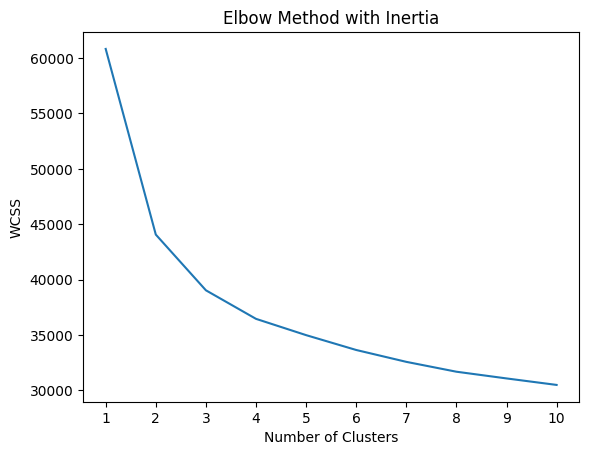

In [552]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title('Elbow Method with Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

When *k*=1, the WCSS has the highest value but as *k* increases, the decrease in the WCSS value starts to deteriorate. We choose the optimal value of *k* at the point where increasing *k* no longer results in a significant decrease in WCSS.

From the plot, we can see that the most optimal number of clusters is around 2-3.

In [553]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
cluster_labels = kmeans.fit_predict(data)

### **Cluster Profiling & Analysis**

Lastly, let's visualize and perform an analysis of the clusters generated.

In [554]:
data['Cluster'] = cluster_labels
ori_data['Cluster'] = cluster_labels

In [555]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data.drop('Cluster', axis=1))

data_pca = pd.DataFrame(data_pca)
data_pca['Cluster'] = cluster_labels

fig = px.scatter_3d(data_pca, x=0, y=1, z=2, color='Cluster')
fig.show()

In [556]:
ori_data[num_cols + ['Cluster']].groupby('Cluster').agg(['mean']).iloc[:,:12]

Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
                mean          mean      mean      mean       mean        mean   
Cluster                                                                         
0        1968.294872  75375.518315  0.023810  0.100733  49.648352  618.675824   
1        1971.786918  33630.792864  0.799802  0.442022  49.303271   38.536174   
2        1964.690370  57653.515556  0.253333  0.934815  48.394074  450.208889   

         MntFruits MntMeatProducts MntFishProducts MntSweetProducts  \
              mean            mean            mean             mean   
Cluster                                                               
0        66.979853      453.602564       99.783883        69.380952   
1         4.791873       21.937562        6.800793         4.865213   
2        25.884444      142.013333       33.579259        26.392593   

        MntGoldProds NumDealsPurchases  
                mean              mean  
Cluster                                 
0          76.628205          1.113553  
1          15.114965          2.006938  
2          61.431111          3.742222

In [557]:
ori_data[num_cols + ['Cluster']].groupby('Cluster').agg(['mean']).iloc[:,12:]

NumWebPurchases NumCatalogPurchases NumStorePurchases  \
                   mean                mean              mean   
Cluster                                                         
0              5.128205            5.897436          8.434066   
1              2.056492            0.526264          3.157582   
2              6.327407            3.118519          7.662222   

        NumWebVisitsMonth  TotalKid Household IncomeHouseholdRatio  \
                     mean      mean      mean                 mean   
Cluster                                                              
0                2.763736  0.124542  1.706960         50400.596154   
1                6.485629  1.241824  2.880079         12665.395837   
2                5.697778  1.188148  2.888889         21224.635901   

          YearJoined  AgeJoined     TotalMnt IncomeMntRatio TotalPurchases  
                mean       mean         mean           mean           mean  
Cluster                                                                     
0        2013.034799  44.739927  1385.051282      60.156483      20.573260  
1        2013.134787  41.347869    92.046581     656.062509       7.747275  
2        2012.863704  48.173333   739.509630      94.152344      20.850370

##### **Takeaways**

Cluster 0:
- Has the highest `Income`, and the highest spending, denoted by `TotalMnt`. They're mostly people who don't have kids at home, as shown by the low `TotalKid` value. Also, their low `NumDealsPurchases` value compared to other clusters shows that this group of customers doesn't care about discounts and promotions. They will still make purchases even if there isn't any promotions.

Cluster 1:
- This is the cluster which contains the customers that has the lowest `Income` and spending (`TotalMnt`). However, their `NumWebVisitsMonth` is pretty high, indicating that they are actually still active and still oftenly browse the products through the web, eventhough in the end they didn't make a purchase. Moreover, their high `IncomeMntRatio` value indicates that they are actually capable of making the purchases, but just didn't do it in the end.

Cluster 2:
- This cluster mostly contains older parents with children that are already in their teenage years, denoted by their high `TeenHome` value. Also, customers from this cluster group are mostly discount shoppers, as shown by the high `NumDealsPurchases` value.